In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
x = np.random.uniform(-10, 10, 1000)
y = np.random.uniform(-10, 10, 1000)
z = 0.5 * x + y

# Разделение на обучающую и тестовую выборки. Целевые значения находятся в labels.
data = np.stack([x.ravel(), y.ravel()], axis=1)
labels = z.ravel()
t_size = int(len(data)*0.8)

train_data, test_data = data[:t_size], data[t_size:]
train_labels, test_labels = labels[:t_size], labels[t_size:]

In [4]:
train_data = train_data.reshape(-1, 2, 1)
test_data = test_data.reshape(-1, 2, 1)

model = models.Sequential([
    # Два сверточных слоя Conv1D
    layers.Conv1D(16, kernel_size=2, activation='relu', padding='same', input_shape=(2, 1)),
    layers.Conv1D(32, kernel_size=2, activation='relu', padding='same'),
    layers.Flatten(), # слой выравнивания
    layers.Dense(10, activation='relu'), # активация ReLU
    layers.Dense(1) # последний слой предсказывает одно значение
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\dapol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(train_data, train_labels, epochs=50, validation_data=(test_data, test_labels))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 34.3907 - mae: 4.8675 - val_loss: 16.4886 - val_mae: 3.3244
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.7447 - mae: 2.9689 - val_loss: 5.1618 - val_mae: 1.8668
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9034 - mae: 1.6276 - val_loss: 0.4583 - val_mae: 0.5525
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2847 - mae: 0.4025 - val_loss: 0.0965 - val_mae: 0.2597
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0751 - mae: 0.2265 - val_loss: 0.0414 - val_mae: 0.1661
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - mae: 0.1499 - val_loss: 0.0329 - val_mae: 0.1485
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - mae: 0.1377 - val_loss: 0.0231 - val_mae: 0.1252
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0213 - mae: 0.1155 - val_loss: 0.0184 - val_mae: 0.1109
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0164 - m

In [6]:
print(model.get_weights()[0])

[[[-0.38259757  0.21810749  0.19578737  0.2538817   0.39222577
   -0.35103196  0.04106121 -0.47744748  0.12989639 -0.22509772
    0.13341647  0.0091741   0.4394211  -0.07683492  0.05189858
    0.36463547]]

 [[ 0.28001568  0.29735655  0.03715339  0.26110312 -0.2546381
   -0.44849998 -0.23043653 -0.06413902 -0.2637043   0.3765721
   -0.15469609 -0.08071446 -0.26139566 -0.06158821 -0.1043833
    0.20348413]]]


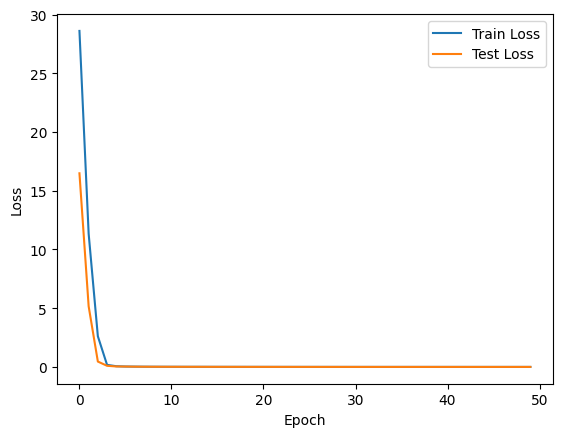

In [7]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


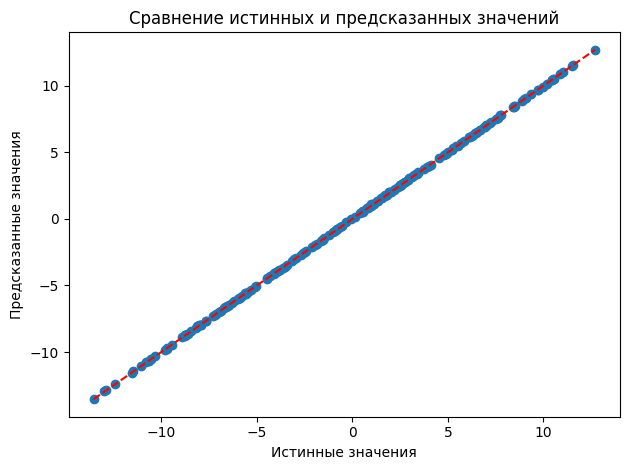

In [8]:
predictions = model.predict(test_data).flatten()  # Предсказания модели
true_values = test_labels  # Истинные значения

plt.scatter(true_values, predictions)
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'r--')  # Линия y=x для сравнения
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')

plt.tight_layout()
plt.show()

In [13]:
x = 0.5
y = 1.5

new_data = np.array([[x, y]])
new_data = new_data.reshape(-1, 2, 1)

predicted_z = model.predict(new_data)

print(f"Predicteed z = {predicted_z[0][0]} \nActual z = {0.5 * x + y}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicteed z = 1.7381672859191895 
Actual z = 1.75
